In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('datasets_2298_3884_car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
vhigh      1727 non-null object
vhigh.1    1727 non-null object
2          1727 non-null object
2.1        1727 non-null object
small      1727 non-null object
low        1727 non-null object
unacc      1727 non-null object
dtypes: object(7)
memory usage: 94.5+ KB


In [4]:
# To check the shape of the data
df.shape

(1727, 7)

In [9]:
# Reanming the columns
col_names = ['buying' , 'meant' , 'doors' , 'persons' , 'lug_boot','safety',
            'class']
df.columns = col_names  # columns which will change the column namesss
col_names

['buying', 'meant', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [6]:
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [10]:
# counting the no of datas in the each column
for col in col_names:
    print(df[col].value_counts())

high     432
low      432
med      432
vhigh    431
Name: buying, dtype: int64
high     432
low      432
med      432
vhigh    431
Name: meant, dtype: int64
3        432
5more    432
4        432
2        431
Name: doors, dtype: int64
more    576
4       576
2       575
Name: persons, dtype: int64
big      576
med      576
small    575
Name: lug_boot, dtype: int64
high    576
med     576
low     575
Name: safety, dtype: int64
unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [11]:
# counting the particular column data
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [12]:
# finding the any null values in the data
df.isnull().sum()
# there is no null values in the data

buying      0
meant       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [13]:
# Dropping the unwanted data columns from the data (if needed!)
# we are using the data wrangling

In [14]:
# Lets train the data by giving the IDV and DV 
X = df.drop(['class'] , axis = 1) # IDV
y = df['class']  # DV

In [15]:
X.head() # which prints except the class

,buying,meant,doors,persons,lug_boot,safety
0,vhigh,vhigh,2,2,small,med
1,vhigh,vhigh,2,2,small,high
2,vhigh,vhigh,2,2,med,low
3,vhigh,vhigh,2,2,med,med
4,vhigh,vhigh,2,2,med,high


In [16]:
y.head()

0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
Name: class, dtype: object

In [17]:
# training and testing the data
from sklearn.model_selection import train_test_split
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [19]:
X_train.shape , X_test.shape

((1157, 6), (570, 6))

In [20]:
y_train.shape , y_train.shape

((1157,), (1157,))

In [21]:
# Encoding the Categorical variables means converting the string values into the categorical variables

In [ ]:
pip install category-encoders

In [22]:
# encoding categorical
import category_encoders as ce

In [23]:
encoder = ce.OrdinalEncoder(cols=['buying', 'meant', 'doors', 'persons', 'lug_boot','safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [24]:
X_train.head()

,buying,meant,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1


In [25]:
X_test.head()

,buying,meant,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
gini = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
gini.fit(X_train , y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [31]:
y_pred_gini = gini.predict(X_test)
y_pred_gini[:7]

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc'],
      dtype=object)

In [32]:
# checking the accuracy score of the data
from sklearn.metrics import accuracy_score

In [34]:
accuracy_score(y_pred_gini , y_test)

0.8052631578947368

[Text(279.0, 380.52, 'X[5] <= 1.5\ngini = 0.457\nsamples = 1157\nvalue = [257, 51, 810, 39]'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 391\nvalue = [0, 0, 391, 0]'),
 Text(418.5, 271.8, 'X[3] <= 1.5\ngini = 0.581\nsamples = 766\nvalue = [257, 51, 419, 39]'),
 Text(279.0, 163.07999999999998, 'gini = 0.0\nsamples = 242\nvalue = [0, 0, 242, 0]'),
 Text(558.0, 163.07999999999998, 'X[0] <= 2.5\ngini = 0.63\nsamples = 524\nvalue = [257, 51, 177, 39]'),
 Text(418.5, 54.360000000000014, 'gini = 0.498\nsamples = 266\nvalue = [124, 0, 142, 0]'),
 Text(697.5, 54.360000000000014, 'gini = 0.654\nsamples = 258\nvalue = [133, 51, 35, 39]')]

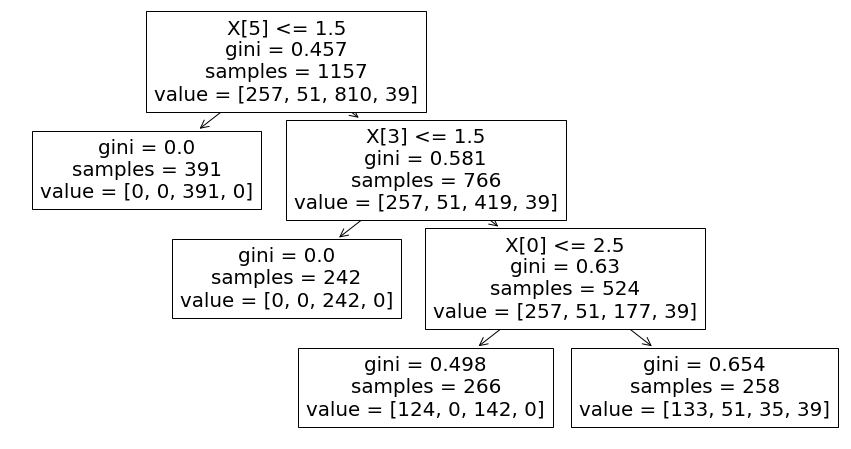

In [35]:
plt.figure(figsize=(15,8))
from sklearn import tree
tree.plot_tree(gini.fit(X_train , y_train))